## Data ٍScience Nanodegree
### Capstone Project



   ##                       Predict the customer's loyalty socre for the ELO 

### step 0: import the data and ncessary libraries for the project 

In [1]:
# Import the necessarylibraries ffor this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

### step 1: Data Exploration:

In [3]:
#load the data the historical data set

data = pd.read_csv('historical_transactions.csv')






In [4]:
print("historical transsacntions dataset has {} data points with {} variables each.".format(*data.shape))

historical transsacntions dataset has 29112361 data points with 14 variables each.


In [5]:
data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [6]:
# explore the data types 
data.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [7]:
# check if there is null values or not 
print(data.isnull().sum())

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64


In [8]:
# change the data type for the purchase date.
data['purchase_date'] = pd.to_datetime(data['purchase_date'])

In [9]:
#explore the new merchant transaction that was given in the same competition. 
new_merchant_transc= pd.read_csv('new_merchant_transactions.csv')

In [30]:
print("new_merchant_transc dataset has {} data points with {} variables each.".format(*new_merchant_transc.shape))

new_merchant_transc dataset has 1963031 data points with 14 variables each.


In [10]:
new_merchant_transc.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


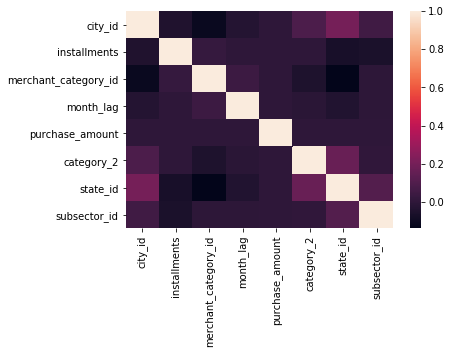

In [11]:


# import the necessary libraries to plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# calculate the correlation matrix
cor = data.corr()

# plot the heatmap
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns)

In [12]:
# load the train data set
train= pd.read_csv("train.csv")

In [31]:
print("training dataset has {} data points with {} variables each.".format(*train.shape))

training dataset has 201917 data points with 6 variables each.


In [13]:
train.head(5)




,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [32]:
# load the test set
test=pd.read_csv('test.csv')

print("testing dataset has {} data points with {} variables each.".format(*test.shape))

testing dataset has 123623 data points with 5 variables each.


In [15]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [41]:
# change the date data type for both data set
train['first_active_month'] = pd.to_datetime(train['first_active_month'])
test['first_active_month'] = pd.to_datetime(test['first_active_month'])

In [40]:
train.dtypes

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object

In [42]:
test.dtypes

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
dtype: object

In [19]:
# check if there is null values in the train data set 
print(train.isnull().sum())

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64


### step 2 : apply the model and check the results: 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [23]:
# load all necessaary libraries for linear regression algorithm to apply to our training data set and test on the test dataset 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
# we used train test split function and we choose the test size 20  and the random state is 300
X_train, X_test, y_train, y_test = train_test_split(train[['feature_1','feature_2','feature_3']],train['target'], 
                                                  test_size=0.2, random_state=300)

### apply the linear regression and check the root mean squared error 

linear_model = LinearRegression().fit(X_train,y_train)
predition = linear_model.predict(X_test)

print("The Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, predition)))




The Root Mean squared error: 3.81


As can be seen above the root mean squared erro is 3.81 which is very high.

### step 3: apply the model on the testing data set and generate the prediction file.

In [37]:

# in the below code we want to the liner model to predict the customer loyalty score based on the above model for the test data set and generate the prediction file to csv file to submit it to the kaggale competition. 
y_test = linear_model.predict(test[['feature_1', 'feature_2', 'feature_3']])
prediction_submission = pd.DataFrame({"card_id": test["card_id"].values})
prediction_submission['target'] = y_test
prediction_submission.to_csv('elo_submission.csv',index=False)

In [26]:

result= pd.read_csv('elo_submission.csv')

In [46]:

result.head()

,card_id,target
0,C_ID_0ab67a22ab,-0.436521
1,C_ID_130fd0cbdd,-0.405767
2,C_ID_b709037bc5,-0.448921
3,C_ID_d27d835a9f,-0.316441
4,C_ID_2b5e3df5c2,-0.448921


### Conculsion: 
    In this captsone project , we applied machine learning model which is a linear regression to predict the customer loyalty score
    for the Elo merchant company. We have explored the given data set and we applied the model on the training set and predict the socre for the testing dataset.
    we found out the  Root Mean squared error is around 3.81 which is very high and needs to be low. So we have to tried another algorithm and do some feature engineering to get better results by adding some columns from the another data set like historical transactions and new merchant transactions. 
   
 